In [35]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

breeds = pd.read_csv('./breed_labels.csv')
colors = pd.read_csv('./color_labels.csv')
states = pd.read_csv('./state_labels.csv')

train = pd.read_csv('./train.csv')
train_size = train.shape[0]
test = pd.read_csv('./test/test.csv')
test_size = test.shape[0]

data_all = pd.concat([train, test])
data_all.head()

,AdoptionSpeed,Age,Breed1,Breed2,Color1,Color2,Color3,Description,Dewormed,Fee,...,Name,PetID,PhotoAmt,Quantity,RescuerID,State,Sterilized,Type,Vaccinated,VideoAmt
0,2.0,3,299,0,1,7,0,Nibble is a 3+ month old ball of cuteness. He ...,2,100,...,Nibble,86e1089a3,1.0,1,8480853f516546f6cf33aa88cd76c379,41326,2,2,2,0
1,0.0,1,265,0,1,2,0,I just found it alone yesterday near my apartm...,3,0,...,No Name Yet,6296e909a,2.0,1,3082c7125d8fb66f7dd4bff4192c8b14,41401,3,2,3,0
2,3.0,1,307,0,2,7,0,Their pregnant mother was dumped by her irresp...,1,0,...,Brisco,3422e4906,7.0,1,fa90fa5b1ee11c86938398b60abc32cb,41326,2,1,1,0
3,2.0,4,307,0,1,2,0,"Good guard dog, very alert, active, obedience ...",1,150,...,Miko,5842f1ff5,8.0,1,9238e4f44c71a75282e62f7136c6b240,41401,2,1,1,0
4,2.0,1,307,0,1,0,0,This handsome yet cute boy is up for adoption....,2,0,...,Hunter,850a43f90,3.0,1,95481e953f8aed9ec3d16fc4509537e8,41326,2,1,2,0


In [36]:
data_all.info()
print(train.shape)
print(test.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18941 entries, 0 to 3947
Data columns (total 24 columns):
AdoptionSpeed    14993 non-null float64
Age              18941 non-null int64
Breed1           18941 non-null int64
Breed2           18941 non-null int64
Color1           18941 non-null int64
Color2           18941 non-null int64
Color3           18941 non-null int64
Description      18927 non-null object
Dewormed         18941 non-null int64
Fee              18941 non-null int64
FurLength        18941 non-null int64
Gender           18941 non-null int64
Health           18941 non-null int64
MaturitySize     18941 non-null int64
Name             17381 non-null object
PetID            18941 non-null object
PhotoAmt         18941 non-null float64
Quantity         18941 non-null int64
RescuerID        18941 non-null object
State            18941 non-null int64
Sterilized       18941 non-null int64
Type             18941 non-null int64
Vaccinated       18941 non-null int64
VideoAmt  

Text(0.5,1,'Adoption speed')

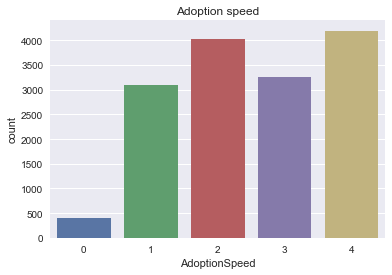

In [37]:
plt.figure()
g = sns.countplot(x='AdoptionSpeed', data=train)
plt.title('Adoption speed')

## Name
I don't think the name of pets really affects the adoption rate much. But whether or not the pet has a name might be important.

In [38]:
train['Name'] = train['Name'].fillna('No name')
test['Name'] = test['Name'].fillna('No name')
data_all['Name'] = data_all['Name'].fillna('No name')

train['No_name'] = 0
train.loc[train['Name'] == 'No name', 'No_name'] = 1
test['No_name'] = 0
test.loc[test['Name'] == 'No name', 'No_name'] = 1
data_all['No_name'] = 0
data_all.loc[data_all['Name'] == 'No name', 'No_name'] = 1

pd.crosstab(train['No_name'], train['AdoptionSpeed'], normalize='index')

AdoptionSpeed,0,1,2,3,4
No_name,,,,,
0,0.027956,0.205227,0.271185,0.221535,0.274097
1,0.020684,0.215593,0.248210,0.171838,0.343675


This analysis shows that pets with no name have higher probability of not being adopted (AdoptionSpeed = 4)

## Age

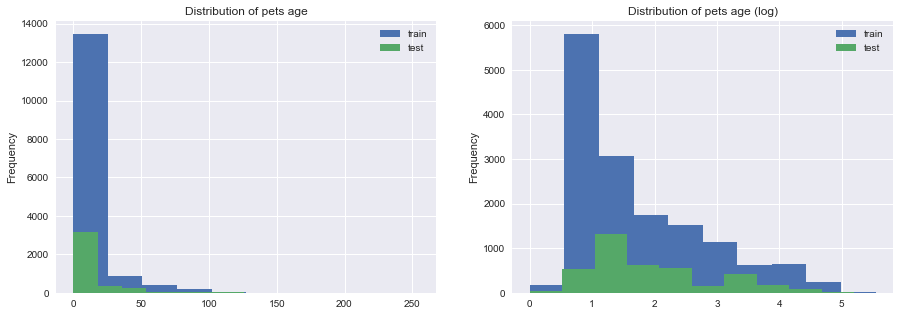

In [39]:
fig, ax = plt.subplots(figsize = (15, 5))
plt.subplot(1, 2, 1)
plt.title('Distribution of pets age');
train['Age'].plot('hist', label='train');
test['Age'].plot('hist', label='test');
plt.legend();

plt.subplot(1, 2, 2)
plt.title('Distribution of pets age (log)');
np.log1p(train['Age']).plot('hist', label='train');
np.log1p(test['Age']).plot('hist', label='test');
plt.legend();

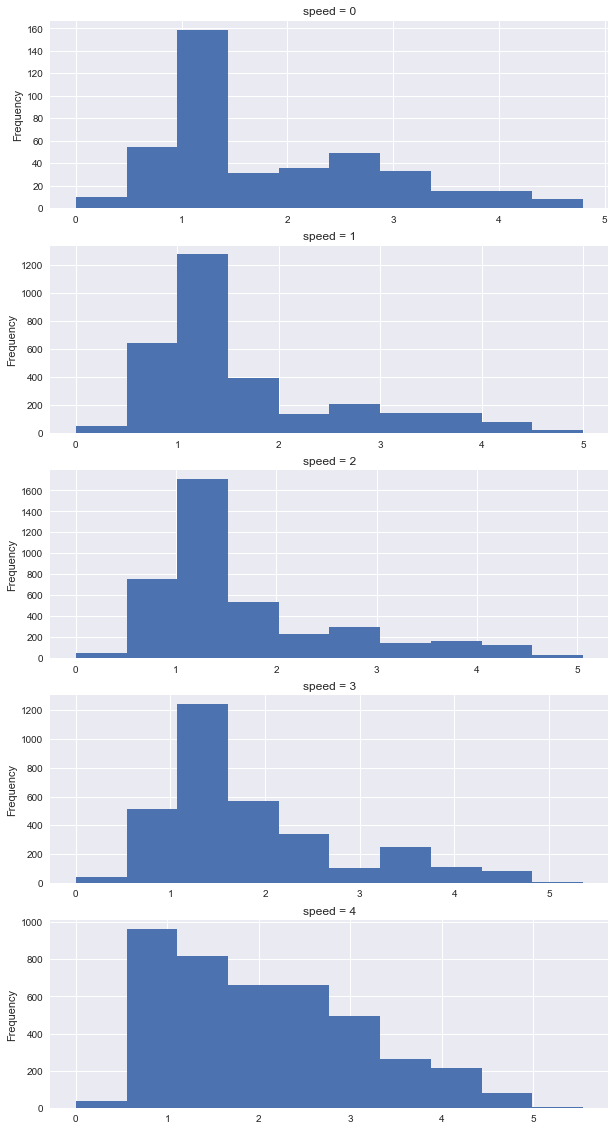

In [40]:
plt.subplots(figsize=(10, 20));
plt.subplot(5, 1, 1);
plt.title('speed = 0');
np.log1p(train[train['AdoptionSpeed']==0]['Age']).plot('hist');
plt.subplot(5, 1, 2);
plt.title('speed = 1');
np.log1p(train[train['AdoptionSpeed']==1]['Age']).plot('hist');
plt.subplot(5, 1, 3);
plt.title('speed = 2');
np.log1p(train[train['AdoptionSpeed']==2]['Age']).plot('hist');
plt.subplot(5, 1, 4);
plt.title('speed = 3');
np.log1p(train[train['AdoptionSpeed']==3]['Age']).plot('hist');
plt.subplot(5, 1, 5);
plt.title('speed = 4');
np.log1p(train[train['AdoptionSpeed']==4]['Age']).plot('hist');

The above plots indicate that old pets are less likely to be adopted (speed = 4 distribution has larger mean)

There are many more features to be explored in this datasets, as well as many new features to be created that are potentially useful for the prediction. In this preliminary analysis, I will choose a set of features that are reasonable for the model prediction from intuition, and test the performance of a baseline model. 

In [41]:
data_all = data_all.drop(['AdoptionSpeed', 'Description', 'PetID', 'RescuerID', 'Name'], axis=1)
data_all.head()

,Age,Breed1,Breed2,Color1,Color2,Color3,Dewormed,Fee,FurLength,Gender,Health,MaturitySize,PhotoAmt,Quantity,State,Sterilized,Type,Vaccinated,VideoAmt,No_name
0,3,299,0,1,7,0,2,100,1,1,1,1,1.0,1,41326,2,2,2,0,0
1,1,265,0,1,2,0,3,0,2,1,1,2,2.0,1,41401,3,2,3,0,0
2,1,307,0,2,7,0,1,0,2,1,1,2,7.0,1,41326,2,1,1,0,0
3,4,307,0,1,2,0,1,150,1,2,1,2,8.0,1,41401,2,1,1,0,0
4,1,307,0,1,0,0,2,0,1,1,1,2,3.0,1,41326,2,1,2,0,0


In [42]:
class_feature = ['Breed1', 'Breed2', 'Color1', 'Color2', 'Color3', 'Dewormed', 'FurLength', 'Gender', 'Health', 'MaturitySize', 'State', 'Sterilized', 'Type', 'Vaccinated']
data_all = pd.get_dummies(data_all, columns=class_feature)

Begin to train

In [43]:
train_X = data_all[:train.shape[0]]
test_X = data_all[train.shape[0]:]
train_y = train['AdoptionSpeed']

In [44]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC, ElasticNetCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler

import xgboost as xgb
import lightgbm as lgb

In [45]:
def rmse_cv(model):
    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    rmse= np.sqrt(-cross_val_score(model, train_X, train_y, scoring="neg_mean_squared_error", cv = kf))  # 默认的cv没有shuffle
    return(rmse.mean())
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [46]:
ENet = ElasticNet(alpha=0.001)
rmse_cv(ENet)

1.1201744132797626

In [47]:
lasso = Lasso(alpha=0.001)
rmse_cv(lasso)

1.1189894326642096

In [48]:
krr = KernelRidge(alpha=1, kernel='polynomial', degree=3)
rmse_cv(krr)

1.1218792438478551

In [49]:
rfr = RandomForestRegressor(n_estimators=3000, n_jobs=-1)
rmse_cv(rfr)

1.092749599383793

In [50]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, loss='huber')
rmse_cv(GBoost)

1.0811964094208431

In [ ]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.903, gamma=0.048, learning_rate=0.05, max_depth=5, 
                             min_child_weight=0.7817, n_estimators=3000, reg_alpha=0.7640, reg_lambda=0.8571,
                             subsample=0.8213, silent=1, random_state =7, n_jobs = -1)
rmse_cv(model_xgb)

In [ ]:
model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=40, learning_rate=0.1, n_estimators=500,
                              max_bin = 50, bagging_fraction = 0.5, bagging_freq = 5, feature_fraction = .8,
                              feature_fraction_seed=9, bagging_seed=9, min_data_in_leaf =10, 
                              min_sum_hessian_in_leaf = 11)
rmse_cv(model_lgb)

In [ ]:
krr.fit(train_X, train_y)
predict_y = krr.predict(test_X) 